# Анализ гипотез над датасетом c вакансиями и резюме

In [ ]:
import kagglehub

path = kagglehub.dataset_download("darysha/hse-hackathon")
path = path + "/train.csv"
print("Path to dataset:", path)

Using Colab cache for faster access to the 'hse-hackathon' dataset.
Path to dataset: /kaggle/input/hse-hackathon/train.csv


In [ ]:
import pandas as pd

df = pd.read_csv(path, sep="|")
df.dropna(axis=1, thresh=len(df) - 0.90 * len(df), inplace=True)

print(df.columns)
df.head()

Index(['idCv', 'idVacancy', 'cv_status', 'locality', 'localityName',
       'birthday', 'gender', 'age', 'positionName', 'dateCreate',
       'typicalPosition_cv', 'dateModify_cv', 'publishedDate', 'skills_cv',
       'driveLicenses', 'experience', 'otherCertificates', 'country',
       'educationList', 'hardSkills_cv', 'softSkills_cv', 'workExperienceList',
       'scheduleType_cv', 'salary_cv', 'retrainingCapability_cv',
       'businessTrip', 'languageKnowledge_cv', 'relocation', 'innerInfo',
       'salaryMin_cv', 'salaryMax_cv', 'education', 'id_vacancy',
       'stateRegionCode_vacancy', 'vacancyName', 'codeProfession',
       'codeProfessionalSphere', 'professionalSphereName', 'vacancyAddress',
       'vacancyAddressHouse', 'vacancyAddressAdditionalInfo', 'geo',
       'salary_vacancy', 'languageKnowledge_vacancy', 'busyType_vacancy',
       'educationRequirements', 'hardSkills_vacancy', 'softSkills_vacancy',
       'skills_vacancy', 'typicalPosition_vacancy', 'experienceRequire

,idCv,idVacancy,cv_status,locality,localityName,birthday,gender,age,positionName,dateCreate,...,regionName,positionRequirements,contactList,additionalRequirements,salaryMin_vacancy,salaryMax_vacancy,qualifications,responsibilities,addressCode,conditions
0,a4419ef0-93f4-11ec-a2fe-839f0d9a4379,72606f42-0c46-11ed-88f6-bf2cfe8c828d,Отказ,7.000900e+12,"Томская-область,-Колпашевский-район,-г-Колпашево",1997-08-25T00:00:00+0400,Мужской,27.0,Музыкальный-руководитель,2022-02-22T18:32:27+0300,...,Томская область,Наличие опыта работы (желательно).,"[{""contactType"": ""Телефон"", ""contactValue"": ""3...",Ответственность,40000.0,50000.0,Наличие опыта работы (желательно).,Качественно и своевременно выполнять возложенн...,7.000000e+12,NaN
1,28438c80-77a8-11ed-bf5f-af80dfa0be97,0610f4d5-3667-11ee-a650-9586bb63c653,Отказ,5.900000e+12,"Пермский-край,-г-Пермь",1986-10-19T15:00:00+0300,Женский,38.0,Специалист-по-кадровому-делопроизводству,2022-12-09T12:59:23+0300,...,Пермский край,среднее или высшее профессиональное образовани...,"[{""contactType"": ""Телефон"", ""contactValue"": ""3...","Работа в организации ""Центр бухгалтерского уче...",36122.0,45000.0,среднее или высшее профессиональное образовани...,"Подготовка кадровых документов (приемы, перево...",5.900000e+16,Оптимальные
2,63c76610-4f7a-11ed-923c-457e0ebd778e,8ee52a15-6d05-11ec-b224-57fc951f3846,Приглашение,5.500000e+12,"Омская-область,-г-Омск",1992-01-08T00:00:00+0200,Женский,33.0,Администратор,2022-10-19T09:50:59+0300,...,NaN,1. Опыт работы на промышленных предприятиях по...,"[{""contactType"": ""Телефон"", ""contactValue"": ""9...",1. Режим работы: пятидневная рабочая неделя (с...,48000.0,48000.0,1. Опыт работы на промышленных предприятиях по...,"1. Обслуживание токарно-винторезных станков, л...",5.500000e+16,Допустимые
3,0bbccaf0-edcf-11ef-bbf5-c7bd3a8c3ec7,393bc6e5-7ec5-11ee-835e-bb4c34bddc95,Отказ,8.600001e+12,Ханты-Мансийский-Автономный-округ---Югра-автон...,1981-09-21T16:00:00+0400,Мужской,43.0,Электромонтер-по-ремонту-и-обслуживанию-электр...,2025-02-18T11:04:58+0300,...,Ханты-Мансийский автономный округ - Югра,Разряд не ниже 4 группа допуска до 1000В отсут...,"[{""contactType"": ""Телефон"", ""contactValue"": ""+...",NaN,42332.0,42332.0,Разряд не ниже 4 группа допуска до 1000В отсут...,"Техническое обслуживание, ремонт и обеспечение...",8.600001e+16,NaN
4,1c482620-2d2e-11ee-a032-d53cd48f29e6,e9b8fe31-3c09-11ec-b525-bf2cfe8c828d,Отказ,5.900000e+12,"Пермский-край,-г-Пермь",1975-12-27T15:00:00+0300,Женский,49.0,торговый-представитель,2023-07-28T13:04:16+0300,...,Пермский край,приветствуется профильное образование (швейное...,"[{""contactType"": ""Телефон"", ""contactValue"": ""3...",Швея,35000.0,65000.0,приветствуется профильное образование (швейное...,"выполнение швейных работ, пошив пооперационный...",5.900000e+16,Допустимые


In [ ]:
import numpy as np

In [ ]:
from scipy import stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Гипотеза №1

Существует статистически значимая разница между средними ожидаемыми зарплатами кандидатов (среднее между `salaryMin_cv`, `salaryMax_cv`) с высшим образованием и без него.

H0: Ожидаемая зарплата **не зависит** от наличия высшего образования

H1: Ожидаемая зарплата **зависит** от наличия высшего образования

In [ ]:
df["education"].unique()

array(['Среднее', 'Высшее-бакалавриат', 'Среднее-профессиональное',
       'Среднее-общее', nan, 'Высшее-специалитет,-магистратура',
       'Нет-основного-общего',
       'Высшее-подготовка-кадров-высшей-квалификации', 'Высшее',
       'Основное-общее', 'Незаконченное-высшее'], dtype=object)

In [ ]:
df_edu = df[["education", "salaryMin_cv", "salaryMax_cv"]].copy()
df_edu["expected_salary"] = (df_edu["salaryMin_cv"] + df_edu["salaryMax_cv"]) / 2

df_edu.drop(["salaryMin_cv", "salaryMax_cv"], axis=1, inplace=True)
df_edu = df_edu[["education", "expected_salary"]].dropna(axis=0)

In [ ]:
has_edu = df_edu["education"].str.contains('высшее', case=False, na=False)

group_edu = df_edu[has_edu]["expected_salary"].values
group_no_edu = df_edu[~has_edu]["expected_salary"].values

Кандидатов с высшим образованием: 69610
Кандидатов без высшего образования: 66671
Средняя ожидаемая зарплата (с высшим): 55267.91
Средняя ожидаемая зарплата (без высшего): 40854.34


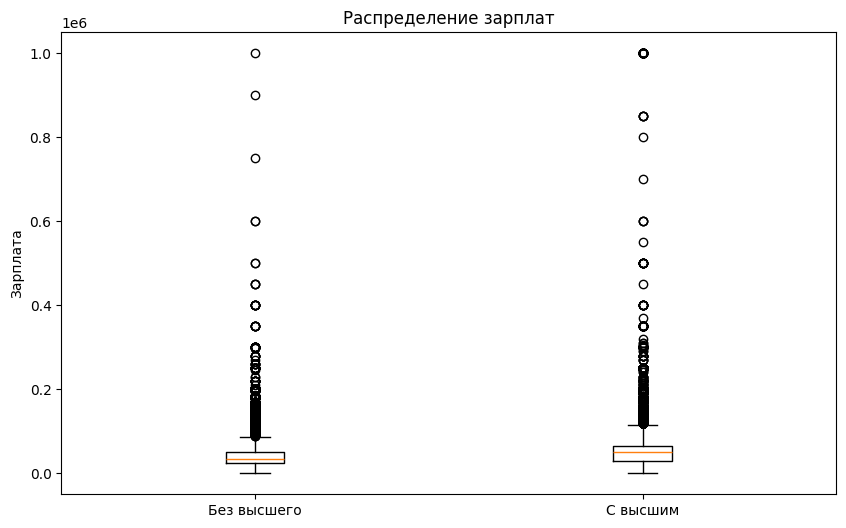

In [ ]:
print(f"Кандидатов с высшим образованием: {len(group_edu)}")
print(f"Кандидатов без высшего образования: {len(group_no_edu)}")
print(f"Средняя ожидаемая зарплата (с высшим): {np.mean(group_edu):.2f}")
print(f"Средняя ожидаемая зарплата (без высшего): {np.mean(group_no_edu):.2f}")

plt.figure(figsize=(10, 6))
plt.boxplot([group_no_edu, group_edu], tick_labels=["Без высшего", "С высшим"])
plt.title("Распределение зарплат")
plt.ylabel("Зарплата")
plt.show()

In [ ]:
def t_test(group1: np.ndarray, group2: np.ndarray, alpha=0.05) -> dict[str, np.float64]:
    n1, n2 = len(group1), len(group2)
    df = n1 + n2 - 2

    mean1, mean2 = np.mean(group1), np.mean(group2)
    diff_mean = mean1 - mean2

    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / df
    se = np.sqrt(pooled_var * (1/n1 + 1/n2))

    return {"t_stat": (mean1 - mean2) / se, "df": df, "diff_mean": diff_mean, "se": se, "alpha": alpha}

In [ ]:
t_test_results = t_test(group_edu, group_no_edu)
print(f"t-статистика: {t_test_results["t_stat"]:.4f}")

t-статистика: 76.5383


In [ ]:
p_value = stats.t.sf(np.abs(t_test_results["t_stat"]), t_test_results["df"]) * 2
p_value

np.float64(0.0)

In [ ]:
t_critical = stats.t.ppf(1 - t_test_results["alpha"] / 2, t_test_results["df"])

ci_lower = t_test_results["diff_mean"] - t_critical * t_test_results["se"]
ci_upper = t_test_results["diff_mean"] + t_critical * t_test_results["se"]

print(f"Разница средних ожидаемых зарплат: {t_test_results["diff_mean"]:.2f}")
print(f"95% доверительный интервал для разницы: [{ci_lower:.2f}, {ci_upper:.2f}]")

Разница средних ожидаемых зарплат: 14413.57
95% доверительный интервал для разницы: [14044.47, 14782.67]


Text(0, 0.5, 'Разница зарплат')

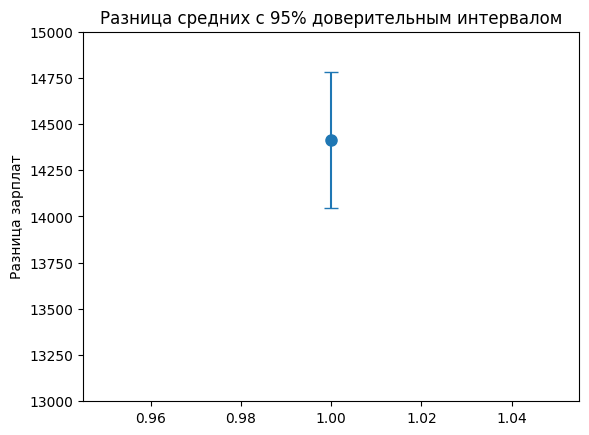

In [ ]:
plt.errorbar(1, t_test_results["diff_mean"], yerr=[[t_test_results["diff_mean"] - ci_lower], [ci_upper - t_test_results["diff_mean"]]],
             fmt='o', capsize=5, markersize=8)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.ylim(13000, 15000)
plt.title("Разница средних с 95% доверительным интервалом")
plt.ylabel("Разница зарплат")

In [ ]:
if p_value < t_test_results["alpha"]:
    if t_test_results["diff_mean"] > 0:
        print("Гипотеза о зависимости зарплат от образования подтверждается: кандидаты с высшим образованием получают значимо более высокие зарплаты")
    else:
        print("Гипотеза о зависимости зарплат от образования подтверждается: кандидаты с высшим образованием получают значимо менее высокие зарплаты")
else:
    print("Гипотеза о зависимости зарплат от образования не подтверждается: нет доказательств влияния образования на зарплату")

Гипотеза о зависимости зарплат от образования подтверждается: кандидаты с высшим образованием получают значимо более высокие зарплаты


## Гипотеза 2

Кандидаты с большим опытом работы (`experience`) имеют статистически значимо более высокую вероятность получить положительный ответ по отклику (`cv_status`), чем кандидаты с меньшим опытом.

H0: Статус отклика не зависит от опыта работы.

H1: Существует зависимость между опытом работы и статусом отклика.

In [ ]:
df["cv_status"].unique()

array(['Отказ', 'Приглашение'], dtype=object)

In [ ]:
df_exp = df[["experience", "cv_status"]].copy()
df_exp["cv_status"] = df_exp["cv_status"].apply(lambda x: 1 if x == "Приглашение" else 0)
df_exp = df_exp[["experience", "cv_status"]].dropna()

In [ ]:
invited = df_exp[df_exp["cv_status"] == 1]["experience"].values
not_invited = df_exp[df_exp["cv_status"] == 0]["experience"].values

In [ ]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)

    t_critical = stats.t.ppf(0.975, n - 1)

    return (mean - t_critical * std_err, mean + t_critical * std_err)

In [ ]:
ci_invited_lower, ci_invited_upper = confidence_interval(invited)
ci_not_invited_lower, ci_not_invited_upper = confidence_interval(not_invited)

mean_invited = np.mean(invited)
mean_not_invited = np.mean(not_invited)

print(f"Доверительный интервал для принятых на работу: ({ci_invited_lower:.2f}, {ci_invited_upper:.2f}), медиана: {mean_invited:.2f}")
print(f"Доверительный интервал для принятых на работу: ({ci_not_invited_lower:.2f}, {ci_not_invited_upper:.2f}), медиана: {mean_not_invited:.2f}")

Доверительный интервал для принятых на работу: (6.36, 6.56), медиана: 6.46
Доверительный интервал для принятых на работу: (7.02, 7.10), медиана: 7.06


In [ ]:
no_overlap = ci_invited_upper < ci_not_invited_lower or ci_not_invited_upper < ci_invited_lower

if no_overlap:
    print("Опыт работы влияет на приглашение")
    if mean_invited > mean_not_invited:
        print("Приглашенные кандидаты имеют больший опыт работы")
    else:
        print("Приглашенные кандидаты имеют меньший опыт работы")
else:
    print("Нет статистической разницы")

Опыт работы влияет на приглашение
Приглашенные кандидаты имеют меньший опыт работы


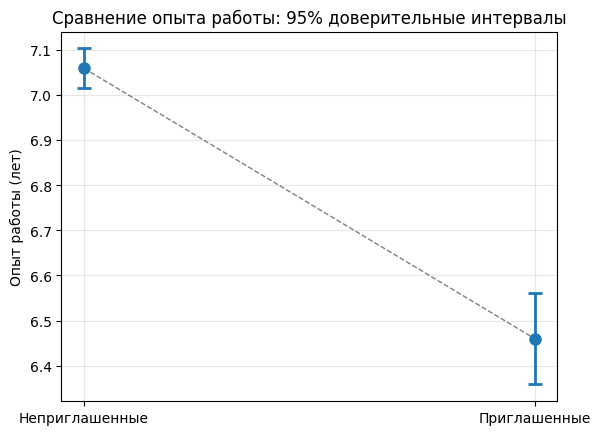

In [ ]:
groups = ["Неприглашенные", "Приглашенные"]
means = [mean_not_invited, mean_invited]
ci_lowers = [ci_not_invited_lower, ci_invited_lower]
ci_uppers = [ci_not_invited_upper, ci_invited_upper]

y_errors_lower = [means[i] - ci_lowers[i] for i in range(2)]
y_errors_upper = [ci_uppers[i] - means[i] for i in range(2)]
y_errors = [y_errors_lower, y_errors_upper]

plt.errorbar(groups, means, yerr=y_errors,
             fmt="o", capsize=5, capthick=2, markersize=8,
             linewidth=2)

plt.ylabel("Опыт работы (лет)")
plt.title("Сравнение опыта работы: 95% доверительные интервалы")
plt.grid(True, alpha=0.3)
if no_overlap:
    plt.plot(groups, means, 'k--', alpha=0.5, linewidth=1)

plt.show()

## Гипотеза 3

Медианная желаемая зарплата кандидатов (`salaryMin_cv`) статистически значимо не отличается от медианной зарплаты, предлагаемой в вакансиях, на которые они откликаются (`salaryMin_vacancy`).


H0: Медианная разница между желаемой и предлагаемой зарплатой равна нулю

H1: Медианная разница между желаемой и предлагаемой зарплатой не равна нулю


In [ ]:
df_salary = df[["salaryMin_cv", "salaryMax_cv", "salaryMin_vacancy"]].copy()

df_salary = df_salary.dropna()

In [ ]:
desired_salaries = df_salary["salaryMin_cv"].values
offered_salaries = df_salary["salaryMin_vacancy"].values

observed_median_diff = np.median(desired_salaries) - np.median(offered_salaries)
observed_median_diff

np.float64(0.0)

=== ДИАГНОСТИКА ДАННЫХ ===
Количество пар: 150492
Медиана разниц: 0.00
Среднее разниц: 923.48
Минимальная разница: -899999.00
Максимальная разница: 973203.00
Стандартное отклонение: 37466.90


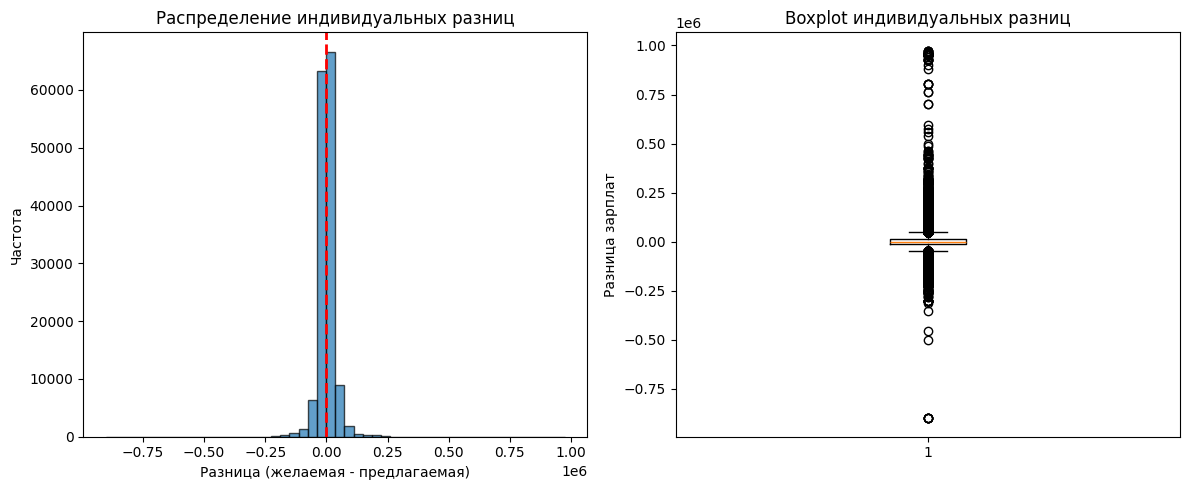


Разниц точно равных 0: 9170 (6.1%)
Разниц больше 0: 67946 (45.1%)
Разниц меньших 0: 73376 (48.8%)


In [ ]:
individual_diffs = desired_salaries - offered_salaries

print("=== ДИАГНОСТИКА ДАННЫХ ===")
print(f"Количество пар: {len(individual_diffs)}")
print(f"Медиана разниц: {np.median(individual_diffs):.2f}")
print(f"Среднее разниц: {np.mean(individual_diffs):.2f}")
print(f"Минимальная разница: {np.min(individual_diffs):.2f}")
print(f"Максимальная разница: {np.max(individual_diffs):.2f}")
print(f"Стандартное отклонение: {np.std(individual_diffs):.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(individual_diffs, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Разница (желаемая - предлагаемая)')
plt.ylabel('Частота')
plt.title('Распределение индивидуальных разниц')

plt.subplot(1, 2, 2)
plt.boxplot(individual_diffs)
plt.ylabel('Разница зарплат')
plt.title('Boxplot индивидуальных разниц')

plt.tight_layout()
plt.show()

exact_zeros = np.sum(individual_diffs == 0)
print(f"\nРазниц точно равных 0: {exact_zeros} ({exact_zeros/len(individual_diffs)*100:.1f}%)")

n_more, n_less = np.sum(individual_diffs > 0), np.sum(individual_diffs < 0)
print(f"Разниц больше 0: {n_more} ({n_more/len(individual_diffs)*100:.1f}%)")
print(f"Разниц меньших 0: {n_less} ({n_less/len(individual_diffs)*100:.1f}%)")

In [ ]:
def manual_binomial_test(n_success, n_trials, p_h0=0.5):
    p_obs = n_success / n_trials
    prob_observed = stats.binom.pmf(n_success, n_trials, p_h0)

    all_outcomes = range(0, n_trials + 1)
    all_probs = stats.binom.pmf(all_outcomes, n_trials, p_h0)

    extreme_probs = all_probs[all_probs <= prob_observed]
    p_value = np.sum(extreme_probs)

    return p_obs, p_value

In [ ]:
if n_more + n_less > 0:
    p_obs, p_val = manual_binomial_test(n_more, n_more + n_less)
    print(f"\nРучной расчет: p_obs = {p_obs:.3f}, p-value = {p_val:.4f}")


Ручной расчет: p_obs = 0.481, p-value = 0.0000


In [ ]:
print("=== ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТА ===")
print(f"Наблюдаемая доля кандидатов, ожидающих БОЛЬШЕ: {p_obs:.3f} ({p_obs*100:.1f}%)")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("СТАТИСТИЧЕСКИ ЗНАЧИМОЕ ОТКЛОНЕНИЕ от 50/50")

    if p_obs < 0.5:
        print("Кандидаты ЗНАЧИМО ЧАЩЕ ожидают МЕНЬШЕ, чем предлагают")
        print(f"Разница от 50%: {(0.5 - p_obs)*100:.1f}%")
    else:
        print("Кандидаты ЗНАЧИМО ЧАЩЕ ожидают БОЛЬШЕ, чем предлагают")
        print(f"Разница от 50%: {(p_obs - 0.5)*100:.1f}%")
else:
    print("Нет значимого отклонения от случайного распределения")

=== ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТА ===
Наблюдаемая доля кандидатов, ожидающих БОЛЬШЕ: 0.481 (48.1%)
P-value: 0.0000
СТАТИСТИЧЕСКИ ЗНАЧИМОЕ ОТКЛОНЕНИЕ от 50/50
Кандидаты ЗНАЧИМО ЧАЩЕ ожидают МЕНЬШЕ, чем предлагают
Разница от 50%: 1.9%
